#Notatki

In [ ]:
from math import sqrt

print(sqrt(22) / sqrt(23))

In [ ]:
#regresja logistyczna za pomocą vanilla python
import math

def LogisticRegression(x, b0, b1):
  return 1.0 / (1.0 + math.exp(-(b0+b1*x)))

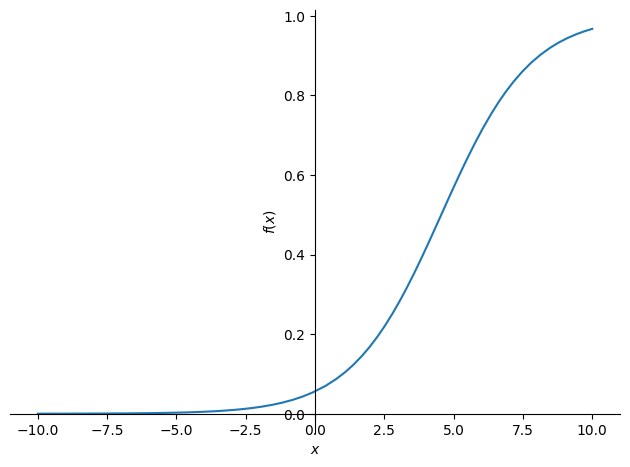

In [ ]:
from sympy import *

b0, b1, x = symbols('b0 b1 x')

p = 1.0 / (1.0 + exp(-(b0+b1*x)))

p = p.subs(b0, -2.823)
p = p.subs(b1, 0.620)

plot(p)

In [ ]:
#Prosta regresja logistyczna przy użyciu SciPy
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=',')

X = df.values[:, :-1]
Y = df.values[:, -1]

model = LogisticRegression(penalty='none')
model.fit(X, Y)

print(model.coef_.flatten())
print(model.intercept_.flatten())

[0.69267212]
[-3.17576395]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
#Obliczanie prawdopodobieństwa łącznego zaobserwowania wszystkich punktów dla danej regresji logistycznej
import math
import pandas as pd

dane_pacjentow = pd.read_csv('https://bit.ly/33ebs2R', delimiter=',').itertuples()

b0 = -3.17576395
b1 = 0.69267212

def funkcja_logistyczna(x):
  p = 1.0 / (1.0 / math.exp(-(b0 + b1 * x)))
  return p

pp_laczne = 1.0

for p in dane_pacjentow:
  if p.y == 1.0:
    pp_laczne *= funkcja_logistyczna(p.x)
  elif p.y == 0.0:
    pp_laczne *= (1.0 - funkcja_logistyczna(p.x))

print(pp_laczne)

9.479789236230274e-06


In [ ]:
#Proste obliczanie prawdopodobieństwa łącznego bez użycia if

for p in dane_pacjentow:
  pp_laczne *= funkcja_logistyczna(p.x) ** p.y * (1.0 - funkcja_logistyczna(p.x)) ** (1.0 - p.y)

In [ ]:
#Używanie logarytmicznego dodawania

pp_laczne = 1.0

for p in dane_pacjentow: pp_laczne += math.log(funkcja_logistyczna(p.x) ** p.y * (1.0 - funkcja_logistyczna(p.x)) ** (1.0 - p.y))

pp_laczne = math.exp(pp_laczne)

In [ ]:
#Regresja logistyczna metodą gradientu prostego
from sympy import *
import pandas as pd

punkty = list(pd.read_csv('https://tinyurl.com/y2cocoo7').itertuples())

b1, b0, i, n = symbols('b1 b0 i n')
x, y = symbols('x y', cls=Function)
pp_laczne = Sum(log((1.0 / (1.0 + exp(- (b0 + b1 * x(i))))) ** y(i) * (1.0 - (1.0 / (1.0 + exp(- (b0 + b1 * x(i)))))) ** (1 - y(i))), (i, 0, n))

#Pochodna względem b1
d_b1 = diff(pp_laczne, b1).subs(n, len(punkty) - 1).doit().replace(x, lambda i: punkty[i].x).replace(y, lambda i: punkty[i].y)

#Pochodna względem b0
d_b0 = diff(pp_laczne, b0).subs(n, len(punkty) - 1).doit().replace(x, lambda i: punkty[i].x).replace(y, lambda i: punkty[i].y)

d_b1 = lambdify([b1, b0], d_b1)
d_b0 = lambdify([b1, b0], d_b0)

#Gradient prosty
b1 = 0.01
b0 = 0.01
L = 0.01

for j in range(10_000):
  b1 += d_b1(b1, b0) * L
  b0 += d_b0(b1, b0) * L

print(b1, b0)

0.6926693075370812 -3.175751550409821


In [ ]:
#Regresja liniowa z wieloma zmiennymi
import pandas as pd
from sklearn.linear_model import LogisticRegression

employee_data = pd.read_csv('https://tinyurl.com/y6r7qjrp')

inputs = employee_data.iloc[:, :-1]
output = employee_data.iloc[:, -1]

fit = LogisticRegression(penalty='none').fit(inputs, output)

print(f'WSPÓŁCZYNNIKI: {fit.coef_.flatten()}')
print(f'WYRAZ WOLNY: {fit.intercept_.flatten()}')

def czy_zostanie(plec, wiek, awanse, lata_zatrudnienia):
  prognoza = fit.predict([[plec, wiek, awanse, lata_zatrudnienia]])
  prawdopodobienstwa = fit.predict_proba([[plec, wiek, awanse, lata_zatrudnienia]])
  if prognoza == [[1]]:
    return f'ODEJDZIE: {prawdopodobienstwa}'
  else:
    return f'ZOSTANIE: {prawdopodobienstwa}'

while True:
  n = input('Prognozuj, czy pracownik zostanie czy odejdzie {płeć},{wiek},{awanse},{lata zatrudnienia}: ')
  (plec, wiek, awanse, lata_zatrudnienia) = n.split(',')

  print(czy_zostanie(int(plec), int(wiek), int(awanse), int(lata_zatrudnienia)))

###Obliczanie R-kwadratu

In [ ]:
from math import log, exp
import pandas as pd

dane_pacjentow = pd.read_csv('https://bit.ly/33ebs2R', delimiter=',').itertuples()

b0 = -3.17576395
b1 = 0.69267212

def funkcja_logistyczna(x):
  p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
  return p

log_wiarygodnosci_dopasowania = 0.0
for p in dane_pacjentow:
  if p.y == 1.0:
    log_wiarygodnosci_dopasowania += log(funkcja_logistyczna(p.x))
  elif p.y == 0.0:
    log_wiarygodnosci_dopasowania += log(1.0 - funkcja_logistyczna(p.x))

In [ ]:
import pandas as pd
from math import log, exp

dane_pacjentow = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=',').itertuples())

wiarygodnosc = sum(p.y for p in dane_pacjentow) / len(dane_pacjentow)

log_wiarygodnosci = 0.0

for p in dane_pacjentow:
  if p.y == 1.0:
    log_wiarygodnosci += log(wiarygodnosc)
  elif p.y == 0.0:
    log_wiarygodnosci += log(1.0 - wiarygodnosc)

print(log_wiarygodnosci)

-14.341070198709906


In [ ]:
r2 = (log_wiarygodnosci - log_wiarygodnosci_dopasowania) / log_wiarygodnosci
print(r2)

0.306456105756576


In [ ]:
#Obliczanie wartości p dla danej regresji logistycznej
import pandas as pd
from math import exp, log
from scipy.stats import chi2

dane_pacjentow = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=',').itertuples())

#Funkcja liniowa dopasowania
b0 = -3.17576395
b1 = 0.69267212

def funkcja_logistyczna(x):
  p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
  return p

log_wiarygodnosci_dopasowania = 0.0
for p in dane_pacjentow:
  if p.y == 1.0:
    log_wiarygodnosci_dopasowania += log(funkcja_logistyczna(p.x))
  elif p.y == 0.0:
    log_wiarygodnosci_dopasowania += log(1.0 - funkcja_logistyczna(p.x))

wiarygodnosc = sum(p.y for p in dane_pacjentow) / len(dane_pacjentow)

log_wiarygodnosci = 0.0
for p in dane_pacjentow:
  if p.y == 1.0:
    log_wiarygodnosci += log(wiarygodnosc)
  elif p.y == 0.0:
    log_wiarygodnosci += log(1.0 - wiarygodnosc)

#Obliczanie wartości p
chi2_wejscie = 2*(log_wiarygodnosci_dopasowania -log_wiarygodnosci)
wartosc_p = chi2.pdf(chi2_wejscie, 1)
print(wartosc_p)

0.0016604875618753787


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv('https://tinyurl.com/y6r7qjrp', delimiter=',')

X = df.values[:, :-1]
Y = df.values[:, -1]

kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LogisticRegression(penalty='none')
wyniki = cross_val_score(model, X, Y, cv=kfold)

print('Średnia dokładności: %.3f (odch. std=%.3f)' % (wyniki.mean(), wyniki.std()))
#W klasyfikacji dokładność modelu nie jest dobrą miarą

Średnia dokładności: 0.611 (odch. std=0.000)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://bit.ly/3cManTi', delimiter=',')

X = df.values[:, :-1]
Y = df.values[:, -1]

model = LogisticRegression(solver='liblinear')

X_trening, X_test, Y_trening, Y_test = train_test_split(X, Y, test_size=1/3, random_state=10)
model.fit(X_trening, Y_trening)
prognoza = model.predict(X_test)

macierz = confusion_matrix(y_true=Y_test, y_pred=prognoza)
print(macierz)

[[6 3]
 [4 5]]


In [ ]:
#Używanie AUC jako parametru scikit-learn

wyniki = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')
print('AUC: %.3f (%.3f)' % (wyniki.mean(), wyniki.std()))

AUC: 0.814 (0.056)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
#Równażenie klas(zwiększanie liczby próbek klasy która rzadziej pojawia się w zbiorze danych) poprzez użycie metody stratify

X_trening, X_test, Y_trening, Y_test = train_test_split(X, Y, test_size=1/3, stratify=Y)

#Zadania

###Dataset

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from math import sqrt, exp

df = pd.read_csv('https://bit.ly/3imidqa', delimiter=',')

X = df.values[:, :-1]
Y = df.values[:, -1]

Ćwiczenie 1

In [ ]:
model = LogisticRegression(solver='liblinear')

kfold = KFold(n_splits=3)

wyniki = cross_val_score(model, X, Y, cv=kfold)

print('Średnia dokładności: %.3f (odch. std=%.3f)' % (wyniki.mean(), wyniki.std()))

Średnia dokładności: 0.967 (odch. std=0.023)


Ćwiczenie 2

In [ ]:
from sklearn.metrics import confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)
model.fit(X_train, Y_train)

matrix = confusion_matrix(y_true=Y_test, y_pred=model.predict(X_test))
matrix

array([[152,   8],
       [  1, 288]])

Ćwiczenie 3

In [ ]:
model.predict([[253, 254, 255]])
#Tak, model dobiera sensownie kolory

array([1])